In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


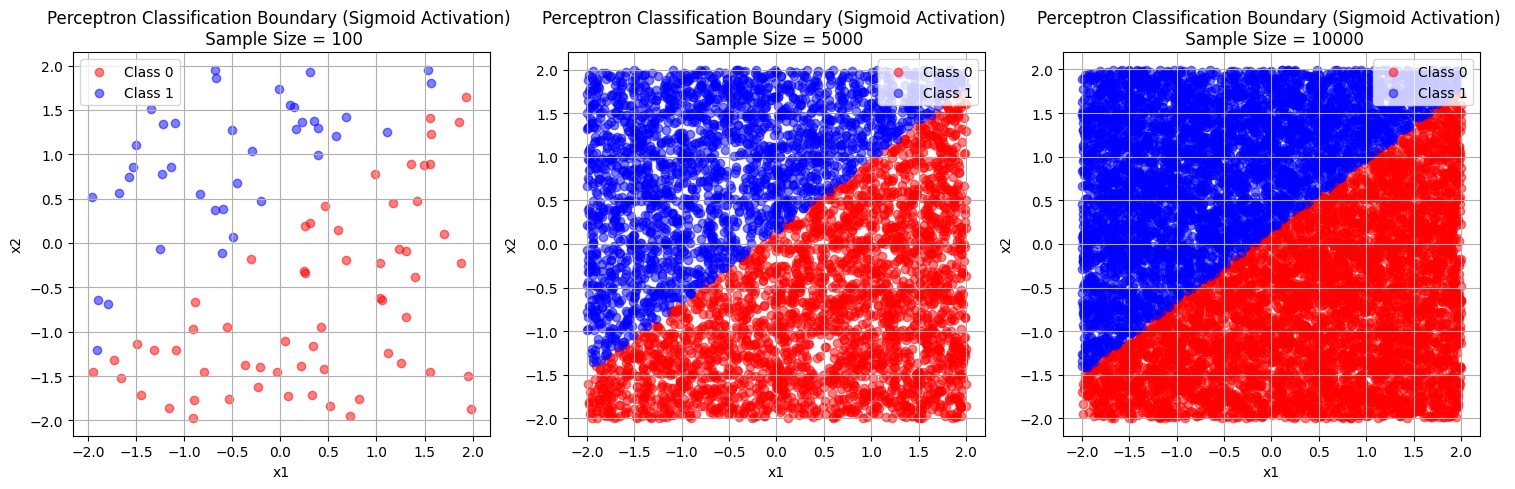

In [55]:
###Problem 2

#Define Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Define Perceptron Function using Sigmoid AF
def perceptron(x1, x2):
    z = -4.79 * x1 + 5.90 * x2 - 0.93
    return sigmoid(z)

#Define the Domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set sample sizes
samples = [100, 5000, 10000]

#Set plot size
plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_sizes in enumerate(samples):
    x1_samples = np.random.uniform(-2, 2, sample_sizes)
    x2_samples = np.random.uniform(-2, 2, sample_sizes)
    y_sigmoid = np.zeros(sample_sizes)

    #Calculate perceptron network's output for each sample
    for j in range(sample_sizes):
        x1 = x1_samples[j]
        x2 = x2_samples[j]
        y_sigmoid[j] = perceptron(x1, x2)

    #Plot for each sample size; red is class 0, blue is class 1.
    plt.subplot(1, len(samples), i + 1)
    threshold = 0.5

    plt.scatter(x1_samples[y_sigmoid < threshold], x2_samples[y_sigmoid < threshold], c='red', label='Class 0', alpha=0.5)
    plt.scatter(x1_samples[y_sigmoid >= threshold], x2_samples[y_sigmoid >= threshold], c='blue', label='Class 1', alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Classification Boundary (Sigmoid Activation) \n Sample Size = {sample_sizes}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

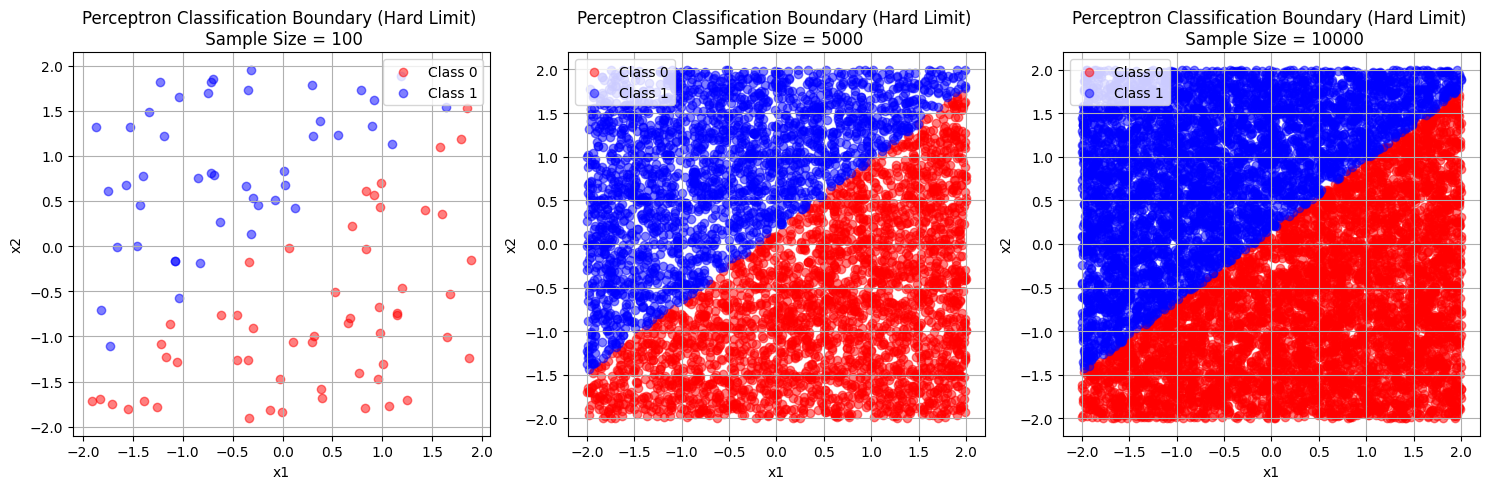

In [64]:
#Define Hard Limit Activation Function
def hard_limit(z):
    return 1 if z >= 0 else 0

#Define Perceptron Function using Hard Limit AF
def perceptron(x1, x2):
    z = -4.79 * x1 + 5.90 * x2 - 0.93
    return hard_limit(z)

#Define the Domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set sample sizes
sample_sizes = [100, 5000, 10000]

#Set plot size
plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_size in enumerate(sample_sizes):
    x1_samples = np.random.uniform(-2, 2, sample_size)
    x2_samples = np.random.uniform(-2, 2, sample_size)
    y_hard_limit = np.zeros(sample_size)

    #Calculate perceptron network's output for each sample
    for j in range(sample_size):
        x1 = x1_samples[j]
        x2 = x2_samples[j]
        y_hard_limit[j] = perceptron(x1, x2)

    #Plot for each sample size; red is class 0, blue is class 1.
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.scatter(x1_samples[y_hard_limit == 0], x2_samples[y_hard_limit == 0], c='red', label='Class 0', alpha=0.5)
    plt.scatter(x1_samples[y_hard_limit == 1], x2_samples[y_hard_limit == 1], c='blue', label='Class 1', alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Classification Boundary (Hard Limit) \n Sample Size = {sample_size}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


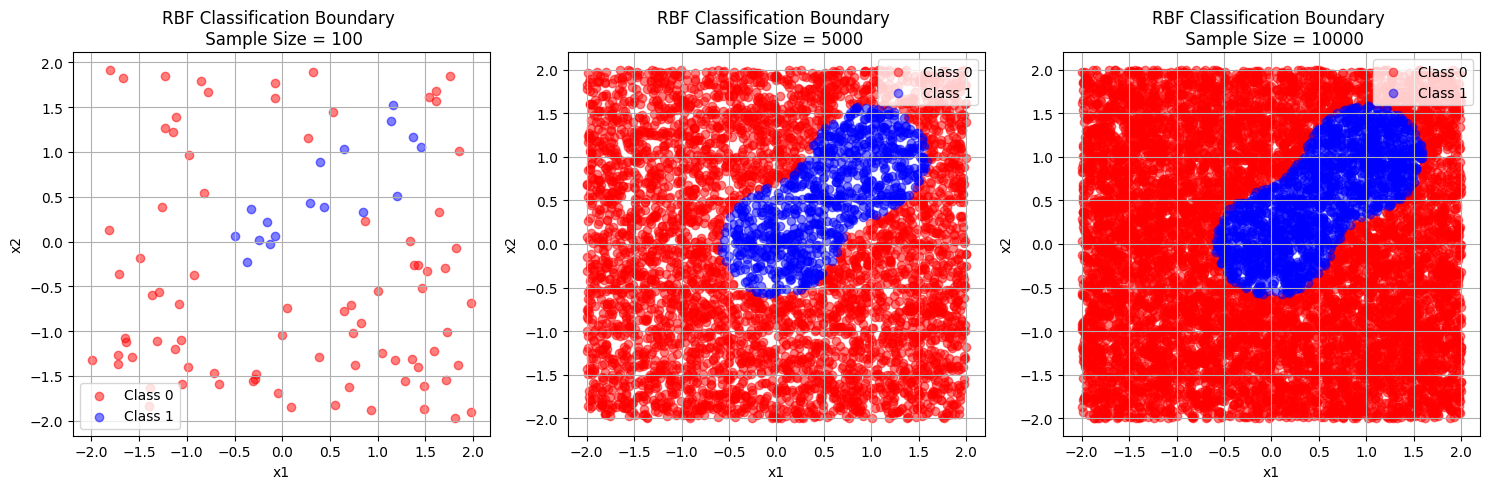

In [68]:
###Can you do RBF on a Perceptron???

#Define Radial Basis Activation Function
def radial_basis(x1, x2, centers, sigma):
    #Calculate Center
    distances = np.sqrt((x1 - centers[:, 0])**2 + (x2 - centers[:, 1])**2)
    #Take the sum over all centers
    return np.exp(-0.5 * (distances / sigma)**2).sum() 

#Define the domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set sample sizes
sample_sizes = [100, 5000, 10000]

#Set plot size
plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_size in enumerate(sample_sizes):
    x1_samples = np.random.uniform(-2, 2, sample_size)
    x2_samples = np.random.uniform(-2, 2, sample_size)

    #Set Centers and Sigma values for RBF
    centers = np.array([[0, 0], [1, 1]])
    sigma = 0.5
    rbf_outputs = np.zeros(sample_size)

    #Calculate RBF's output for each sample
    for j in range(sample_size):
        x1 = x1_samples[j]
        x2 = x2_samples[j]
        rbf_outputs[j] = radial_basis(x1, x2, centers, sigma)

    #Plot for each sample size; red is class 0, blue is class 1.
    plt.subplot(1, len(sample_sizes), i + 1)
    threshold = 0.5

    # Classify points and plot them with different colors for each class
    plt.scatter(x1_samples[rbf_outputs < threshold], x2_samples[rbf_outputs < threshold], c='red', label='Class 0', alpha=0.5)
    plt.scatter(x1_samples[rbf_outputs >= threshold], x2_samples[rbf_outputs >= threshold], c='blue', label='Class 1', alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'RBF Classification Boundary \n Sample Size = {sample_size}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()